<a href="https://colab.research.google.com/github/ruchitha11n/data-science-ExcelR/blob/main/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

NAME: **NADIPELLI RUCHITHA**

COURSE: **DATA SCIENCE (3PM TO 5PM)**

INCHARGE: **PANAM SRAVANI**

ASS_17 : SVM

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline


In [ ]:
# Task 1: Exploratory Data Analysis (EDA)
# Load the Mushroom dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data"
columns = ['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
           'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
           'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
           'stalk-surface-below-ring', 'stalk-color-above-ring',
           'stalk-color-below-ring', 'veil-type', 'veil-color',
           'ring-number', 'ring-type', 'spore-print-color',
           'population', 'habitat']
df = pd.read_csv(url, header=None, names=columns)

print("Dataset shape:", df.shape)
print("\nFirst 5 rows:")
print(df.head())

Dataset shape: (8124, 23)

First 5 rows:
  class cap-shape cap-surface cap-color bruises odor gill-attachment  \
0     p         x           s         n       t    p               f   
1     e         x           s         y       t    a               f   
2     e         b           s         w       t    l               f   
3     p         x           y         w       t    p               f   
4     e         x           s         g       f    n               f   

  gill-spacing gill-size gill-color  ... stalk-surface-below-ring  \
0            c         n          k  ...                        s   
1            c         b          k  ...                        s   
2            c         b          n  ...                        s   
3            c         n          n  ...                        s   
4            w         b          k  ...                        s   

  stalk-color-above-ring stalk-color-below-ring veil-type veil-color  \
0                      w               


Missing values:
class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64


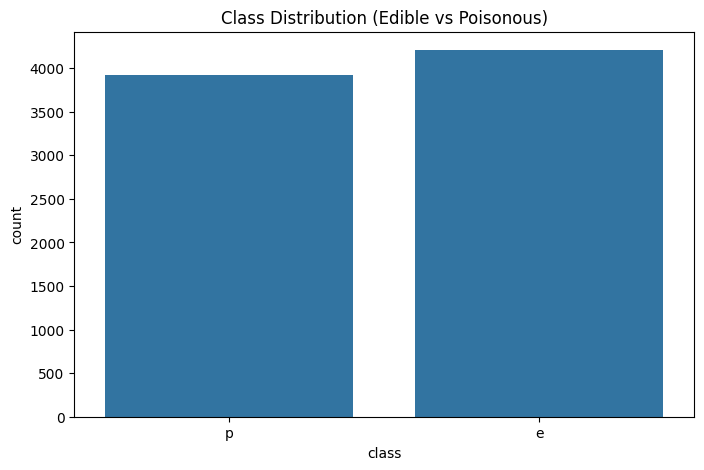

In [ ]:
# Check for missing values
print("\nMissing values:")
print(df.isnull().sum())

# Visualize class distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='class', data=df)
plt.title('Class Distribution (Edible vs Poisonous)')
plt.show()

In [ ]:
# Task 2: Data Preprocessing
# Encode categorical variables
le = LabelEncoder()
df_encoded = df.apply(le.fit_transform)


In [ ]:
# Separate features and target
X = df_encoded.drop('class', axis=1)
y = df_encoded['class']

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


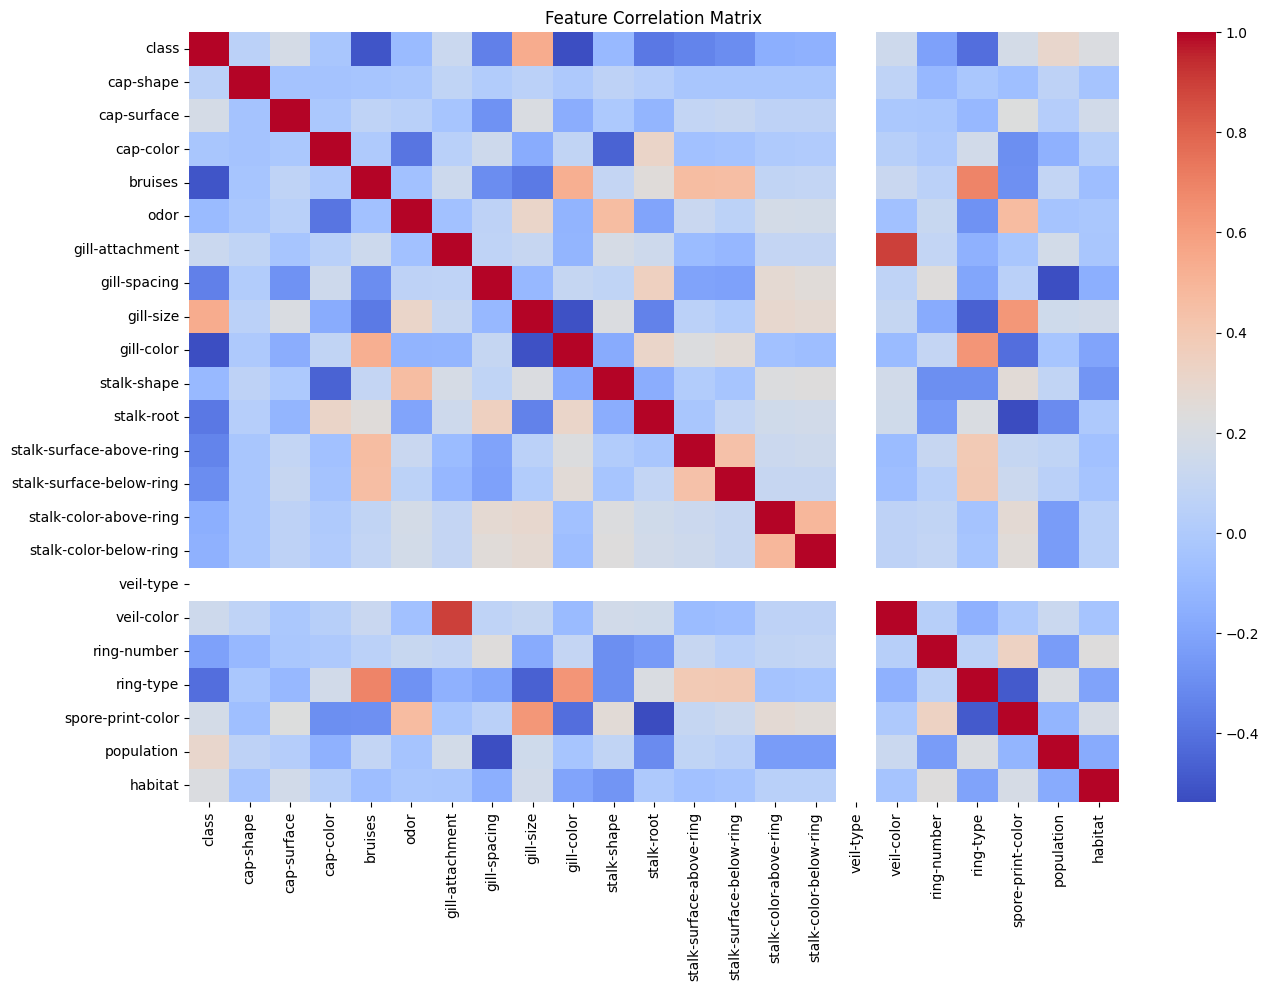

In [ ]:
# Task 3: Data Visualization
# Visualize feature correlations
plt.figure(figsize=(15, 10))
sns.heatmap(df_encoded.corr(), annot=False, cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.show()


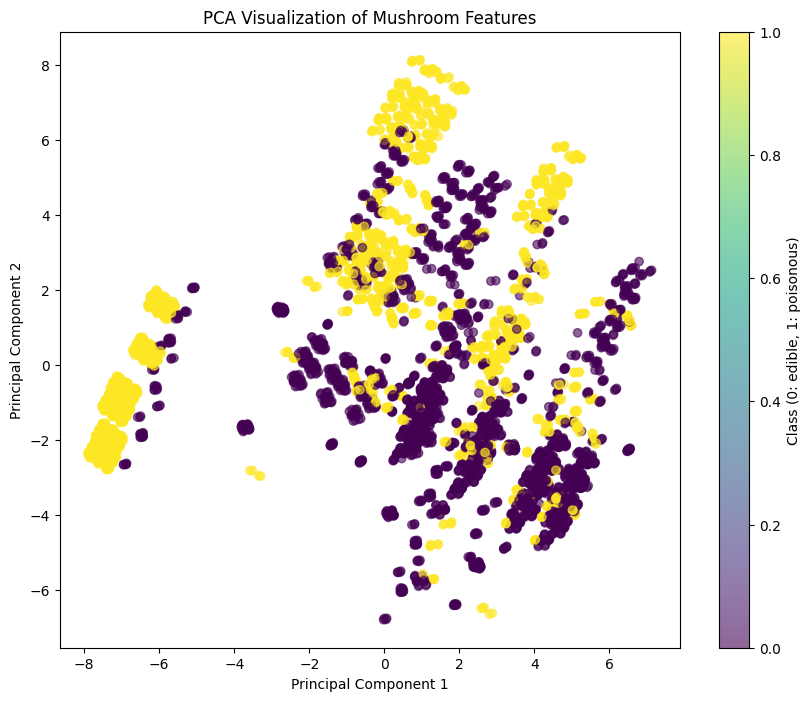

In [ ]:
# PCA for dimensionality reduction and visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train)

plt.figure(figsize=(10, 8))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_train, cmap='viridis', alpha=0.6)
plt.title('PCA Visualization of Mushroom Features')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Class (0: edible, 1: poisonous)')
plt.show()


In [ ]:
# Task 4: SVM Implementation
# Create SVM classifier with RBF kernel
svm = SVC(kernel='rbf', random_state=42)
svm.fit(X_train, y_train)

# Evaluate model
y_pred = svm.predict(X_test)
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['edible', 'poisonous']))



Classification Report:
              precision    recall  f1-score   support

      edible       0.98      1.00      0.99      1257
   poisonous       1.00      0.98      0.99      1181

    accuracy                           0.99      2438
   macro avg       0.99      0.99      0.99      2438
weighted avg       0.99      0.99      0.99      2438



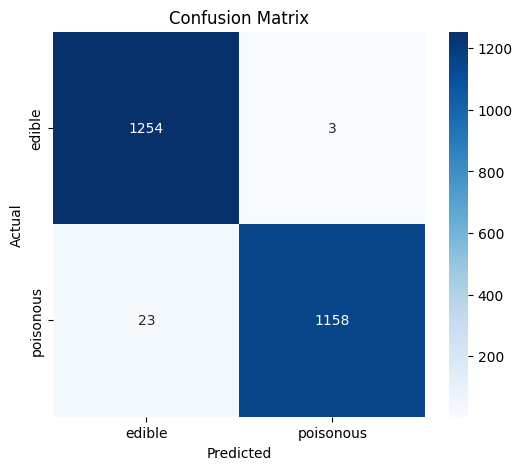

In [ ]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['edible', 'poisonous'],
            yticklabels=['edible', 'poisonous'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
# Task 5: Visualization of SVM Results
# Visualize decision boundary using PCA components
def plot_decision_boundary(clf, X, y):
    h = .02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(10, 8))
    plt.contourf(xx, yy, Z, alpha=0.8, cmap='viridis')
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap='viridis')
    plt.title('SVM Decision Boundary (PCA-reduced data)')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.show()

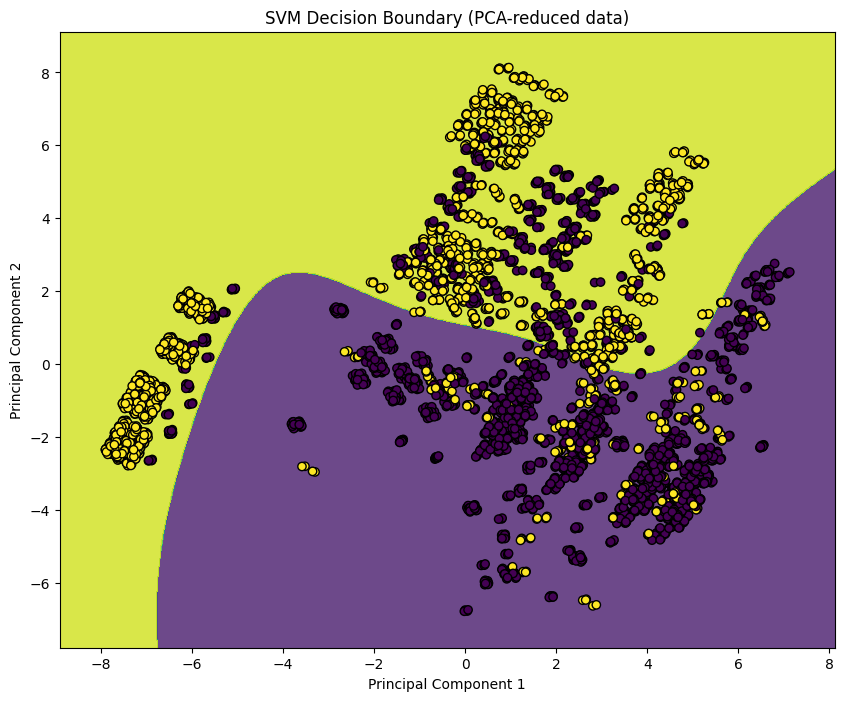

In [ ]:
# Train SVM on PCA components
svm_pca = SVC(kernel='rbf', random_state=42)
svm_pca.fit(X_pca, y_train)
plot_decision_boundary(svm_pca, X_pca, y_train)

In [ ]:
# Task 6: Parameter Tuning and Optimization
# Define parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf', 'linear', 'poly']
}

In [ ]:
# Grid search with cross-validation
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=2, cv=5)
grid.fit(X_train, y_train)

print("\nBest parameters found:")
print(grid.best_params_)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   1.5s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   2.2s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   1.9s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   1.5s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   1.6s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.4s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.4s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.5s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.5s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.6s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.2s
[CV] END ........................C=0.1, gamma=1

In [ ]:
# Evaluate best model
best_svm = grid.best_estimator_
y_pred_best = best_svm.predict(X_test)
print("\nOptimized Classification Report:")
print(classification_report(y_test, y_pred_best, target_names=['edible', 'poisonous']))


Optimized Classification Report:
              precision    recall  f1-score   support

      edible       1.00      1.00      1.00      1257
   poisonous       1.00      1.00      1.00      1181

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438




Accuracy comparison by kernel:
linear: 0.9610
poly: 0.9996
rbf: 0.9893
sigmoid: 0.4811


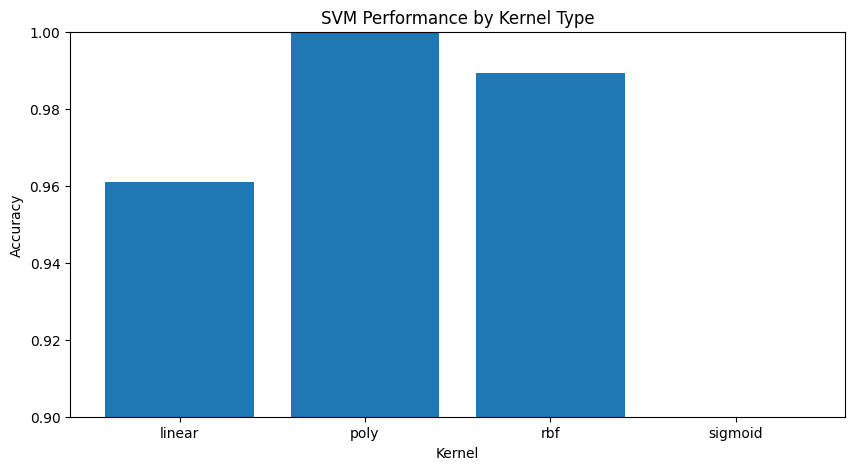

In [ ]:

# Task 7: Comparison and Analysis
# Compare different kernels
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
results = {}

for kernel in kernels:
    model = SVC(kernel=kernel, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[kernel] = acc

print("\nAccuracy comparison by kernel:")
for kernel, acc in results.items():
    print(f"{kernel}: {acc:.4f}")

# Plot kernel comparison
plt.figure(figsize=(10, 5))
plt.bar(results.keys(), results.values())
plt.title('SVM Performance by Kernel Type')
plt.xlabel('Kernel')
plt.ylabel('Accuracy')
plt.ylim(0.9, 1.0)
plt.show()